MannwhitneyuResult(statistic=4353567.0, pvalue=0.0)

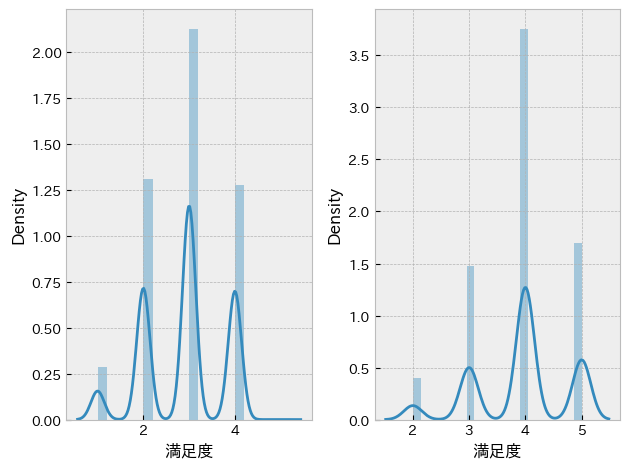

In [27]:
"""
データ分析　演習問題1

目的：性別と満足度の関係を調べる
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh') # matplotlib のスタイルの設定

df = pd.read_csv('../../data/dummy_data/hotel_reviews.csv')

# TODO:性別と満足度の関係を調べる

# とりあえず可視化（満足度と性別の関係を）
sns.countplot(x='満足度', hue='性別', data=df)

# 集計してみる
group = df.groupby('性別')
# NOTE: agg: aggregate(集約)の略。
#    集約関数をリストで指定でき、複数の集約を一度に行うことができる
group['満足度'].agg(['mean', 'median'])

# 差があるか検定
group1 = group.get_group('男性')
group2 = group.get_group('女性')

# とりあえず可視化
plt.subplot(1, 2, 1)
sns.distplot(group1['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(group2['満足度'])
plt.tight_layout()

# NOTE:散布数が多いので、ダグラス・ピーターソン検定を使って正規性を検定
# NOTE: normaltest: 正規性検定
# NOTE: exponential: 指数分布 ...etc
stats.kstest(group1['満足度'], 'norm') # 正規性なし
stats.kstest(group2['満足度'], 'norm') # 正規性なし

# NOTE:正規性がなく、対応がないので、mannwhitneyu検定を使う
stats.mannwhitneyu(group1['満足度'], group2['満足度']) # p値が0.05より大きので、差があるかわからない。





In [ ]:
# TODO:Wifi設備と満足度の関係を調べる

# とりあえず可視化
sns.countplot(x='満足度', hue='Wifi設備', data=df)

# Wifi設備の評価ごとの満足度を集計
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])

# Wifi設備と満足度の関連性を検定
crosstab = pd.crosstab(df['満足度'], df['Wifi設備'])

chi2, p, dof, expected = stats.chi2_contingency(crosstab, correction=False)
p # p値が0.05より小さいので、関連性がある(独立でない)と言える。

# Wifi設備が3以下の人と、3より大きい人の満足度の差があるかどうかを検定
# 　これにより、Wifi設備が満足度に寄与しているかどうかを検定できる。

satis_0 = df.query('Wifi設備 <= 3') # or df[df['Wifi設備'] <= 3]
satis_1 = df.query('Wifi設備 > 3') # or df[df['Wifi設備'] > 3]

satis_0['満足度'].mean()
satis_1['満足度'].mean()


# 正規性の検定

# とりあえず可視化
plt.subplot(1, 2, 1)
sns.distplot(satis_0['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(satis_1['満足度'])
plt.tight_layout()

# 検定
stats.kstest(satis_0['満足度'], 'norm') # 正規性なし
stats.kstest(satis_1['満足度'], 'norm') # 正規性なし

stats.mannwhitneyu(satis_0['満足度'], satis_1['満足度']) # p値が0.05より小さいので、差があると言える。